<a href="https://colab.research.google.com/github/watermelonDrip/Collected-Mistakes/blob/main/ML_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 机器学习练习 1 - 线性回归

这个是另一位大牛写的，作业内容在根目录： [作业文件](ex1.pdf)

代码修改并注释：黄海广，haiguang2000@qq.com

## 单变量线性回归

In [667]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [668]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [669]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [670]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


看下数据长什么样子

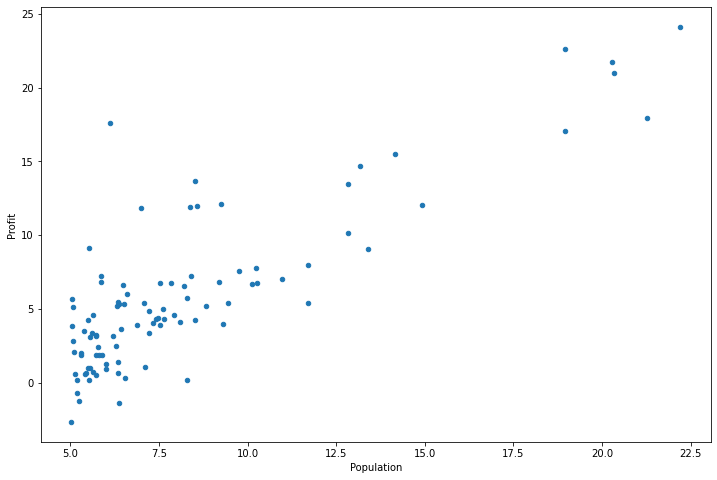

In [671]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [672]:
def get_device():
  #  if GPU , get device
    return 'cuda' if torch.cuda.is_available() else 'cpu'

## computeCost(X, y, theta):(numpy)

In [673]:
#def computeCost(X, y, theta):
 #   inner = np.power(((X * theta.T) - y), 2)
 #   return np.sum(inner) / (2 * len(X))

In [674]:
#def computeCost(X, y, theta):
 #   criterion  = nn.MSELoss(reduction='mean')
 #   return criterion(X * theta.T,y)

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [675]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [676]:
# set X (training data) and y (target variable)
cols = data.shape[1]
print(cols)
X = data.iloc[:,1:cols]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列
inputDim  = X.shape
print(inputDim)

3
(97, 2)


观察下 X (训练集) and y (目标变量)是否正确.

In [677]:
X.head()#head()是观察前5行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [678]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

##numpy (read data)

In [679]:
#X = np.matrix(X.values)
#y = np.matrix(y.values)
#theta = np.matrix(np.array([0,0]))

In [680]:
from torch.autograd import Variable

X = np.array(X)
y = np.array(y)
theta = np.array([0,0])


#X = torch.FloatTensor(X)
#y = torch.FloatTensor(y)
#theta = torch.FloatTensor(theta)


theta 是一个(1,2)矩阵

In [681]:
theta

array([0, 0])

看下维度

In [682]:
X.shape, theta.shape, y.shape

((97, 2), (2,), (97, 1))

计算代价函数 (theta初始值为0).

In [683]:
#computeCost(X, y, theta)

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [684]:
#def gradientDescent(X, y, theta, alpha, iters):
#    temp = np.matrix(np.zeros(theta.shape))
#    parameters = int(theta.ravel().shape[1])
#    cost = np.zeros(iters)
#    
#    for i in range(iters):
#        error = (X * theta.T) - y
#        
#        for j in range(parameters):
#            term = np.multiply(error, X[:,j])
#            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
#            
#        theta = temp
#        cost[i] = computeCost(X, y, theta)
#        
#    return theta, cost

In [685]:
from torch.cuda import device
#def gradientDescent(X, y, theta, alpha, iters):
#    X,y = X.to(device), y.to(device)
 #   for i in range(iters):
 #       while torch.no_grad():
 #           mse_loss = computeCost(X, y, theta)
 #           print(mse_loss)

        

In [686]:
import torch
from torch.autograd import Variable
## torch 
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim,output_dim)
        # Mean squared error loss
        self.criterion = nn.MSELoss(reduction = 'mean')
        
    def forward(self,x):
        out = self.linear(x)
        return out
    def cal_loss(self, pred, target):
        ''' Calculate loss '''
        # TODO: you may implement L2 regularization here
       #  self.criterion = ((pred - target.cuda())**2).mean() 
        x = self.criterion(pred, target)
        res = torch.div(x, 2)
        return res
        

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [687]:
learningRate = 0.001
epochs = 1000
input_dim = 2
output_dim  = 1

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [688]:
model = LinearRegression(input_dim, output_dim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [689]:
#criterion = torch.nn.MSELoss()   # define MMSE
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) # optimization method

In [690]:
for epoch in range(epochs):
   # model.train() 
    # Converting inputs and labels to Variable (Gpu)
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(X).cuda())
        labels = Variable(torch.from_numpy(y).cuda())
    else:
        inputs = Variable(torch.from_numpy(X))
        
        labels = Variable(torch.from_numpy(y))
    optimizer.zero_grad()
    # get output from the model, given the inputs
    outputs = model(inputs.float())
    #print(outputs)
    # get loss for the predicted output
    #loss = criterion(outputs.float(), labels.float())
    mse_loss = model.cal_loss(outputs.float(), labels.float())  # compute loss
    # get gradients w.r.t to parameters

    mse_loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, mse_loss.item()))

epoch 0, loss 46.49204635620117
epoch 1, loss 34.75977325439453
epoch 2, loss 26.065746307373047
epoch 3, loss 19.622045516967773
epoch 4, loss 14.845108985900879
epoch 5, loss 11.302716255187988
epoch 6, loss 8.674750328063965
epoch 7, loss 6.7241058349609375
epoch 8, loss 5.275180816650391
epoch 9, loss 4.197910308837891
epoch 10, loss 3.3959619998931885
epoch 11, loss 2.7979884147644043
epoch 12, loss 2.3511431217193604
epoch 13, loss 2.0162856578826904
epoch 14, loss 1.7644282579421997
epoch 15, loss 1.5740963220596313
epoch 16, loss 1.4293874502182007
epoch 17, loss 1.3185209035873413
epoch 18, loss 1.2327711582183838
epoch 19, loss 1.165675163269043
epoch 20, loss 1.1124449968338013
epoch 21, loss 1.0695345401763916
epoch 22, loss 1.0343157052993774
epoch 23, loss 1.004841685295105
epoch 24, loss 0.9796704053878784
epoch 25, loss 0.9577322006225586
epoch 26, loss 0.9382345676422119
epoch 27, loss 0.9205906987190247
epoch 28, loss 0.9043643474578857
epoch 29, loss 0.88923168182373

In [691]:
#g, cost = gradientDescent(X, y, theta, alpha, iters)
#g

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [692]:
#computeCost(X, y, g)

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

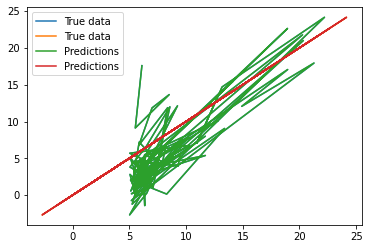

In [699]:
with torch.no_grad(): # we don't need gradients in the testing phase
    # Converting inputs and labels to Variable (Gpu)
 
    predicted = model(inputs.float()).cpu().data.numpy()
     
   

plt.clf()
plt.plot(X, y, 'go', label='True data')
plt.plot(X, predicted, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

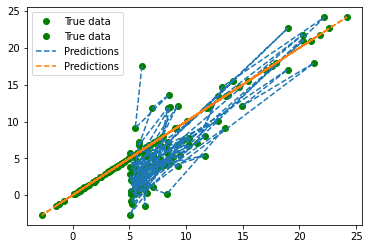

In [694]:
with torch.no_grad(): # we don't need gradients in the testing phase
    # Converting inputs and labels to Variable (Gpu)
 
    predicted = model(inputs.float()).cpu().data.numpy()
     
   

plt.clf()
plt.plot(X, y, 'go', label='True data')
plt.plot(X, predicted, '--', label='Predictions')
plt.legend(loc='best')
plt.show()

(97, 2)


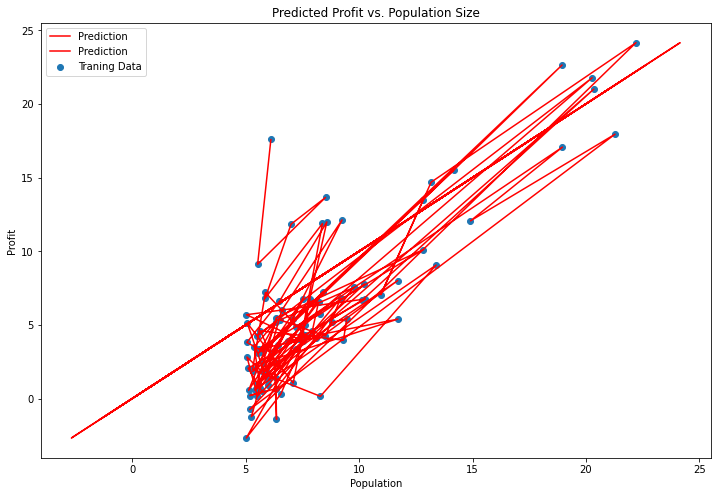

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

## 多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [ ]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

我们也可以快速查看这一个的训练进程。

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

scikit-learn model的预测表现

In [ ]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [ ]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [ ]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

In [ ]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

在练习2中，我们将看看分类问题的逻辑回归。